**Libraries Imported:**

**pandas (pd):** Library for data manipulation and analysis.<br>
**numpy (np):** Library providing support for multi-dimensional arrays and matrices.<br>
**matplotlib.pyplot (plt):** Library for creating visualizations in Python.<br>
**Modules and Classes Imported from sklearn:**<br>
**make_pipeline:** Constructs a pipeline from a series of transformers and an estimator.<br>
**make_column_transformer:** Constructs a transformer from columns or arrays.<br>
**make_column_selector:** Constructs a selector to choose columns.<br>
**StandardScaler:** Preprocessing class for standardizing features by scaling them to have a mean of 0 and variance of 1.<br>
**LabelEncoder:** Preprocessing class for encoding categorical features into numeric labels.<br>
**OneHotEncoder:** Preprocessing class for one-hot encoding categorical features.<br>
**SimpleImputer:** Preprocessing class for imputing missing values in datasets.<br>
**RandomForestClassifier:** Ensemble learning method based on decision trees for classification tasks.<br>
**VotingClassifier:** Combines multiple individual classifiers to make a final prediction using majority voting or averaging.<br>
**LogisticRegression:** Linear classification model for logistic regression.<br>
**train_test_split:** Function for splitting datasets into training and testing sets.<br>
**SVC:** Support Vector Classifier for classification tasks.<br>
These imported modules and classes from sklearn encompass a wide range of functionalities for data preprocessing, model creation, ensemble methods, and evaluation within the machine learning workflow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
disabled = pd.read_csv('India-disability-data(cleaned).csv')
df = disabled.copy()
df.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [3]:
df.columns

Index(['State Code', 'Area Name', 'Total/ Rural/Urban', 'Disability',
       'Age-group', 'Total disabled population - Persons',
       'Total disabled population - Males',
       'Total disabled population - Females', 'Main worker - Persons',
       'Main worker - Males', 'Main worker - Females', 'Non-worker - Persons',
       'Non-worker - Males', 'Non-worker - Females'],
      dtype='object')


This code filters a DataFrame named df to exclude rows where specific columns **('Area Name', 'Total/ Rural/Urban', 'Disability', 'Age-group')** contain the value **'Total'**. This operation effectively removes entries representing aggregated or total values in these categorical columns, refining the DataFrame to focus on specific categories rather than overall sums or aggregates.

In [4]:
df = df[df['Area Name'] != 'INDIA'] 
df = df[df['Total/ Rural/Urban'] != 'Total']
df = df[df['Disability'] != 'Total']
df = df[df['Age-group'] != 'Total']
df.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
186,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,0-14,10502,5720,4782,73,44,29,10027,5442,4585
187,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,15-59,23093,12785,10308,6090,5450,640,11035,3807,7228
188,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,60+,16496,8482,8014,1953,1779,174,12186,5141,7045
189,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,Age not stated,51,32,19,8,8,0,38,22,16
191,1,State - JAMMU & KASHMIR (01),Rural,In-Hearing,0-14,12461,6652,5809,122,91,31,11994,6393,5601


**df.reset_index(drop=True, inplace=True)** resets the index of the DataFrame df after the previous filtering operations and makes the changes in place, dropping the existing index. The resulting DataFrame will have a new index that starts from zero and increments sequentially.

In [5]:
df.reset_index(drop=True, inplace=True)
df

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,0-14,10502,5720,4782,73,44,29,10027,5442,4585
1,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,15-59,23093,12785,10308,6090,5450,640,11035,3807,7228
2,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,60+,16496,8482,8014,1953,1779,174,12186,5141,7045
3,1,State - JAMMU & KASHMIR (01),Rural,In-Seeing,Age not stated,51,32,19,8,8,0,38,22,16
4,1,State - JAMMU & KASHMIR (01),Rural,In-Hearing,0-14,12461,6652,5809,122,91,31,11994,6393,5601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,35,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Any-Other,Age not stated,0,0,0,0,0,0,0,0,0
2236,35,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Multiple-Disability,0-14,60,37,23,1,1,0,59,36,23
2237,35,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Multiple-Disability,15-59,88,53,35,15,15,0,71,37,34
2238,35,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Multiple-Disability,60+,17,8,9,2,2,0,15,6,9



The slicing operation applied to the **'Area Name'** column serves to eliminate specific patterns, such as state names or numerical indicators at the end of each string. This action aims to standardize the 'Area Name' values, ensuring a more consistent and generalized representation of geographical areas throughout the dataset.

In [6]:
# df['Area Name'] = df['Area Name'][1]

for i in range(0,len(df)):
    df['Area Name'][i] = df['Area Name'][i][8:-5]
df['Area Name'].value_counts()

C:\Users\fameen97\AppData\Local\Temp\ipykernel_15732\170451736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area Name'][i] = df['Area Name'][i][8:-5]


JAMMU & KASHMIR              64
MAHARASHTRA                  64
ODISHA                       64
CHHATTISGARH                 64
MADHYA PRADESH               64
GUJARAT                      64
DAMAN & DIU                  64
DADRA & NAGAR HAVELI         64
ANDHRA PRADESH               64
WEST BENGAL                  64
KARNATAKA                    64
GOA                          64
LAKSHADWEEP                  64
KERALA                       64
TAMIL NADU                   64
PUDUCHERRY                   64
JHARKHAND                    64
ASSAM                        64
HIMACHAL PRADESH             64
UTTAR PRADESH                64
PUNJAB                       64
CHANDIGARH                   64
UTTARAKHAND                  64
HARYANA                      64
NCT OF DELHI                 64
RAJASTHAN                    64
BIHAR                        64
MEGHALAYA                    64
SIKKIM                       64
ARUNACHAL PRADESH            64
NAGALAND                     64
MANIPUR 

**df = df.drop('State Code', axis=1)** removes the column labeled 'State Code' from the DataFrame df. This action effectively drops the entire column labeled 'State Code', refining the DataFrame by eliminating this specific column from the dataset. 

In [7]:
# df = df.drop('Total disabled population - Persons', axis=1)
df = df.drop('State Code', axis=1)
df

,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,JAMMU & KASHMIR,Rural,In-Seeing,0-14,10502,5720,4782,73,44,29,10027,5442,4585
1,JAMMU & KASHMIR,Rural,In-Seeing,15-59,23093,12785,10308,6090,5450,640,11035,3807,7228
2,JAMMU & KASHMIR,Rural,In-Seeing,60+,16496,8482,8014,1953,1779,174,12186,5141,7045
3,JAMMU & KASHMIR,Rural,In-Seeing,Age not stated,51,32,19,8,8,0,38,22,16
4,JAMMU & KASHMIR,Rural,In-Hearing,0-14,12461,6652,5809,122,91,31,11994,6393,5601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,Age not stated,0,0,0,0,0,0,0,0,0
2236,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,0-14,60,37,23,1,1,0,59,36,23
2237,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,15-59,88,53,35,15,15,0,71,37,34
2238,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,60+,17,8,9,2,2,0,15,6,9


Each line of code performs normalization by dividing specific columns related to males and females (e.g., 'Total disabled population - Females', 'Main worker - Males', 'Main worker - Females', etc.) by the total disabled population represented in the 'Total disabled population - Persons' column. This normalization aims to represent the data as proportions or percentages relative to the total disabled population, providing a standardized comparison across various categories related to gender-specific disabilities and workforce participation.

In [8]:
# df['Total disabled population - Males'] = df['Total disabled population - Males']/df['Total disabled population - Persons']
df['Total disabled population - Females'] = df['Total disabled population - Females']/df['Total disabled population - Persons']
df['Main worker - Males'] = df['Main worker - Males']/df['Total disabled population - Persons']
df['Main worker - Females'] = df['Main worker - Females']/df['Total disabled population - Persons']
df['Non-worker - Males'] = df['Non-worker - Males']/df['Total disabled population - Persons']
df['Non-worker - Females'] = df['Non-worker - Females']/df['Total disabled population - Persons']



df

,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,JAMMU & KASHMIR,Rural,In-Seeing,0-14,10502,5720,0.455342,73,0.004190,0.002761,10027,0.518187,0.436584
1,JAMMU & KASHMIR,Rural,In-Seeing,15-59,23093,12785,0.446369,6090,0.236002,0.027714,11035,0.164855,0.312995
2,JAMMU & KASHMIR,Rural,In-Seeing,60+,16496,8482,0.485815,1953,0.107844,0.010548,12186,0.311651,0.427073
3,JAMMU & KASHMIR,Rural,In-Seeing,Age not stated,51,32,0.372549,8,0.156863,0.000000,38,0.431373,0.313725
4,JAMMU & KASHMIR,Rural,In-Hearing,0-14,12461,6652,0.466174,122,0.007303,0.002488,11994,0.513041,0.449482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,Age not stated,0,0,NaN,0,NaN,NaN,0,NaN,NaN
2236,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,0-14,60,37,0.383333,1,0.016667,0.000000,59,0.600000,0.383333
2237,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,15-59,88,53,0.397727,15,0.170455,0.000000,71,0.420455,0.386364
2238,ANDAMAN & NICOBAR ISLANDS,Urban,Multiple-Disability,60+,17,8,0.529412,2,0.117647,0.000000,15,0.352941,0.529412


In [9]:
sum(df['Total disabled population - Persons'])

26814994

The variable labels captures categorical information from the **'Disability'** column in the DataFrame df, signifying it contains specific classifications or labels related to disabilities. After extraction, the code removes this 'Disability' column from the DataFrame df, indicating a deliberate separation between the target labels and the remaining features within the dataset.

In [10]:
labels = df['Disability']
df.drop('Disability', axis=1, inplace = True)
df

,Area Name,Total/ Rural/Urban,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,JAMMU & KASHMIR,Rural,0-14,10502,5720,0.455342,73,0.004190,0.002761,10027,0.518187,0.436584
1,JAMMU & KASHMIR,Rural,15-59,23093,12785,0.446369,6090,0.236002,0.027714,11035,0.164855,0.312995
2,JAMMU & KASHMIR,Rural,60+,16496,8482,0.485815,1953,0.107844,0.010548,12186,0.311651,0.427073
3,JAMMU & KASHMIR,Rural,Age not stated,51,32,0.372549,8,0.156863,0.000000,38,0.431373,0.313725
4,JAMMU & KASHMIR,Rural,0-14,12461,6652,0.466174,122,0.007303,0.002488,11994,0.513041,0.449482
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ANDAMAN & NICOBAR ISLANDS,Urban,Age not stated,0,0,NaN,0,NaN,NaN,0,NaN,NaN
2236,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,60,37,0.383333,1,0.016667,0.000000,59,0.600000,0.383333
2237,ANDAMAN & NICOBAR ISLANDS,Urban,15-59,88,53,0.397727,15,0.170455,0.000000,71,0.420455,0.386364
2238,ANDAMAN & NICOBAR ISLANDS,Urban,60+,17,8,0.529412,2,0.117647,0.000000,15,0.352941,0.529412


**df.isna().sum()** is used to assertively calculate and display the count of missing values (NaN or null values) in each column of the DataFrame df. This operation facilitates a comprehensive understanding of the extent of missing data within the dataset, offering a precise count for each column, indicating the number of missing values present.

In [11]:
simpleImpute = SimpleImputer(strategy='median')
[df['Total disabled population - Persons']] = simpleImpute.fit_transform([df['Total disabled population - Persons']])
df

,Area Name,Total/ Rural/Urban,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,JAMMU & KASHMIR,Rural,0-14,10502.0,5720,0.455342,73,0.004190,0.002761,10027,0.518187,0.436584
1,JAMMU & KASHMIR,Rural,15-59,23093.0,12785,0.446369,6090,0.236002,0.027714,11035,0.164855,0.312995
2,JAMMU & KASHMIR,Rural,60+,16496.0,8482,0.485815,1953,0.107844,0.010548,12186,0.311651,0.427073
3,JAMMU & KASHMIR,Rural,Age not stated,51.0,32,0.372549,8,0.156863,0.000000,38,0.431373,0.313725
4,JAMMU & KASHMIR,Rural,0-14,12461.0,6652,0.466174,122,0.007303,0.002488,11994,0.513041,0.449482
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ANDAMAN & NICOBAR ISLANDS,Urban,Age not stated,0.0,0,NaN,0,NaN,NaN,0,NaN,NaN
2236,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,60.0,37,0.383333,1,0.016667,0.000000,59,0.600000,0.383333
2237,ANDAMAN & NICOBAR ISLANDS,Urban,15-59,88.0,53,0.397727,15,0.170455,0.000000,71,0.420455,0.386364
2238,ANDAMAN & NICOBAR ISLANDS,Urban,60+,17.0,8,0.529412,2,0.117647,0.000000,15,0.352941,0.529412


In [12]:
df.isna().sum()

Area Name                                0
Total/ Rural/Urban                       0
Age-group                                0
Total disabled population - Persons      0
Total disabled population - Males        0
Total disabled population - Females    110
Main worker - Persons                    0
Main worker - Males                    110
Main worker - Females                  110
Non-worker - Persons                     0
Non-worker - Males                     110
Non-worker - Females                   110
dtype: int64

The variable **cat_coder** initializes an instance of the OneHotEncoder, a categorical encoding method. Subsequently, the fit method is applied to the first three columns (iloc[:,:3]) of the DataFrame df. This action configures the encoder to understand and encode categorical data within these specific columns.

In [13]:
df['Total disabled population - Persons'] = df['Total disabled population - Persons']/sum(df['Total disabled population - Persons'])
df

,Area Name,Total/ Rural/Urban,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,JAMMU & KASHMIR,Rural,0-14,3.916466e-04,5720,0.455342,73,0.004190,0.002761,10027,0.518187,0.436584
1,JAMMU & KASHMIR,Rural,15-59,8.611973e-04,12785,0.446369,6090,0.236002,0.027714,11035,0.164855,0.312995
2,JAMMU & KASHMIR,Rural,60+,6.151782e-04,8482,0.485815,1953,0.107844,0.010548,12186,0.311651,0.427073
3,JAMMU & KASHMIR,Rural,Age not stated,1.901921e-06,32,0.372549,8,0.156863,0.000000,38,0.431373,0.313725
4,JAMMU & KASHMIR,Rural,0-14,4.647027e-04,6652,0.466174,122,0.007303,0.002488,11994,0.513041,0.449482
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ANDAMAN & NICOBAR ISLANDS,Urban,Age not stated,0.000000e+00,0,NaN,0,NaN,NaN,0,NaN,NaN
2236,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,2.237554e-06,37,0.383333,1,0.016667,0.000000,59,0.600000,0.383333
2237,ANDAMAN & NICOBAR ISLANDS,Urban,15-59,3.281746e-06,53,0.397727,15,0.170455,0.000000,71,0.420455,0.386364
2238,ANDAMAN & NICOBAR ISLANDS,Urban,60+,6.339737e-07,8,0.529412,2,0.117647,0.000000,15,0.352941,0.529412


In [78]:
df.to_csv('processed.csv')

In [14]:
cat_coder = OneHotEncoder()
cat_coder.fit(df.iloc[:,:3])
a  = cat_coder.transform(df.iloc[:,:3])
cat_coder.categories_

[array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
        'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
        'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'GOA', 'GUJARAT', 'HARYANA',
        'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
        'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
        'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI',
        'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
        'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
        'WEST BENGAL'], dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['0-14', '15-59', '60+', 'Age not stated'], dtype=object)]

The code **cat_coder.get_feature_names_out()** retrieves the feature names after applying the OneHotEncoder transformation.
 It provides a clear and structured representation of the new features created from the categorical columns, enabling better understanding and interpretation of the transformed dataset.

In [15]:
cat_coder.get_feature_names_out()

array(['Area Name_ANDAMAN & NICOBAR ISLANDS', 'Area Name_ANDHRA PRADESH',
       'Area Name_ARUNACHAL PRADESH', 'Area Name_ASSAM',
       'Area Name_BIHAR', 'Area Name_CHANDIGARH',
       'Area Name_CHHATTISGARH', 'Area Name_DADRA & NAGAR HAVELI',
       'Area Name_DAMAN & DIU', 'Area Name_GOA', 'Area Name_GUJARAT',
       'Area Name_HARYANA', 'Area Name_HIMACHAL PRADESH',
       'Area Name_JAMMU & KASHMIR', 'Area Name_JHARKHAND',
       'Area Name_KARNATAKA', 'Area Name_KERALA', 'Area Name_LAKSHADWEEP',
       'Area Name_MADHYA PRADESH', 'Area Name_MAHARASHTRA',
       'Area Name_MANIPUR', 'Area Name_MEGHALAYA', 'Area Name_MIZORAM',
       'Area Name_NAGALAND', 'Area Name_NCT OF DELHI', 'Area Name_ODISHA',
       'Area Name_PUDUCHERRY', 'Area Name_PUNJAB', 'Area Name_RAJASTHAN',
       'Area Name_SIKKIM', 'Area Name_TAMIL NADU', 'Area Name_TRIPURA',
       'Area Name_UTTAR PRADESH', 'Area Name_UTTARAKHAND',
       'Area Name_WEST BENGAL', 'Total/ Rural/Urban_Rural',
       'Total/ Rur


The attribute **cat_coder.n_features_in_** serves the purpose of indicating the number of input features provided to the area_coder instance during its fitting or configuration phase.. Specifically, it denotes the count of input features that were used to train or fit the categorical encoder (cat_coder).

In [16]:
cat_coder.n_features_in_

3

Converting the encoded data which is sparse matrix to a dataframe

In [17]:
 encoded_data = pd.DataFrame(a.toarray(), columns=cat_coder.get_feature_names_out())

In [18]:
b = cat_coder.inverse_transform(a)
b

array([['JAMMU & KASHMIR', 'Rural', '0-14'],
       ['JAMMU & KASHMIR', 'Rural', '15-59'],
       ['JAMMU & KASHMIR', 'Rural', '60+'],
       ...,
       ['ANDAMAN & NICOBAR ISLANDS', 'Urban', '15-59'],
       ['ANDAMAN & NICOBAR ISLANDS', 'Urban', '60+'],
       ['ANDAMAN & NICOBAR ISLANDS', 'Urban', 'Age not stated']],
      dtype=object)

In [19]:
encoded_data = encoded_data.join(df['Total disabled population - Persons'])

In [20]:
encoded_data.columns

Index(['Area Name_ANDAMAN & NICOBAR ISLANDS', 'Area Name_ANDHRA PRADESH',
       'Area Name_ARUNACHAL PRADESH', 'Area Name_ASSAM', 'Area Name_BIHAR',
       'Area Name_CHANDIGARH', 'Area Name_CHHATTISGARH',
       'Area Name_DADRA & NAGAR HAVELI', 'Area Name_DAMAN & DIU',
       'Area Name_GOA', 'Area Name_GUJARAT', 'Area Name_HARYANA',
       'Area Name_HIMACHAL PRADESH', 'Area Name_JAMMU & KASHMIR',
       'Area Name_JHARKHAND', 'Area Name_KARNATAKA', 'Area Name_KERALA',
       'Area Name_LAKSHADWEEP', 'Area Name_MADHYA PRADESH',
       'Area Name_MAHARASHTRA', 'Area Name_MANIPUR', 'Area Name_MEGHALAYA',
       'Area Name_MIZORAM', 'Area Name_NAGALAND', 'Area Name_NCT OF DELHI',
       'Area Name_ODISHA', 'Area Name_PUDUCHERRY', 'Area Name_PUNJAB',
       'Area Name_RAJASTHAN', 'Area Name_SIKKIM', 'Area Name_TAMIL NADU',
       'Area Name_TRIPURA', 'Area Name_UTTAR PRADESH', 'Area Name_UTTARAKHAND',
       'Area Name_WEST BENGAL', 'Total/ Rural/Urban_Rural',
       'Total/ Rural/Urba

In [77]:
len(encoded_data['Total disabled population - Persons'].unique())

1478

In [21]:
# encoded_data.isnull().sum()
labels

0                 In-Seeing
1                 In-Seeing
2                 In-Seeing
3                 In-Seeing
4                In-Hearing
               ...         
2235              Any-Other
2236    Multiple-Disability
2237    Multiple-Disability
2238    Multiple-Disability
2239    Multiple-Disability
Name: Disability, Length: 2240, dtype: object

# Voting Classfier

In [22]:
X = encoded_data.values
y = labels.values
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
print(le.inverse_transform(y))

[3 3 3 ... 7 7 7]
['In-Seeing' 'In-Seeing' 'In-Seeing' ... 'Multiple-Disability'
 'Multiple-Disability' 'Multiple-Disability']


**train_test_split(X, y, random_state=42)**
Splits the dataset into training and testing sets for both features (X) and target labels (y). random_state=42 ensures reproducibility by fixing the random seed.

**VotingClassifier**
Creates an ensemble classifier that combines predictions from multiple base estimators (classifiers). The provided estimators are:

**Logistic Regression ('lr'):*** A linear classification model.
**Random Forest ('rf'):*** An ensemble learning method based on decision trees.
**Support Vector Classifier ('svc'):** A classifier that uses support vector machines.
**voting_clf.fit(X_train, y_train)**
Trains the VotingClassifier using the training data (X_train, y_train). The individual classifiers specified within the VotingClassifier are trained on the provided data.

This ensemble technique aggregates predictions from multiple classifiers to make a final prediction, potentially enhancing overall performance by leveraging diverse modeling approaches.

In [46]:
print([df.iloc[0,:3]])
on = cat_coder.transform([df.iloc[0,:3]])
on.toarray()

[Area Name             JAMMU & KASHMIR
Total/ Rural/Urban              Rural
Age-group                        0-14
Name: 0, dtype: object]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0.]])

In [36]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.91646554e-04])

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

**for name, clf in voting_clf.named_estimators_.items():**
Iterates through each individual estimator (classifier) contained within the VotingClassifier. named_estimators_ is an attribute that provides access to the individual estimators along with their assigned names.

**clf.score(X_test, y_test)**
Calculates the accuracy score of each individual classifier (clf) by evaluating its predictions on the test data (X_test, y_test). The score method computes the accuracy of the classifier by comparing its predictions with the true labels and returns the accuracy score.

**print(f"{name} accuracy = {score}")**
Displays the accuracy score of each individual classifier by printing its name (name) along with the corresponding accuracy score (score). This allows for a comparison of the performance of each classifier within the ensemble on the test dataset.

In [24]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.03214285714285714
rf = 0.0
svc = 0.02142857142857143


In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score 
print("score",voting_clf.score(X_train,y_train))
print("f1_score",f1_score(y_train, voting_clf.predict(X_train), average='weighted'))
print("precision",precision_score(y_train, voting_clf.predict(X_train), average='weighted'))
print("recall_Score",recall_score(y_train, voting_clf.predict(X_train), average='weighted'))
print("test")
print("score",voting_clf.score(X_test,y_test))
print("f1_Score",f1_score(y_test, voting_clf.predict(X_test), average='weighted'))
print("precision",precision_score(y_test, voting_clf.predict(X_test), average='weighted'))
print("recall",recall_score(y_test, voting_clf.predict(X_test), average='weighted'))

score 0.3482142857142857
f1_score 0.33684694979843466
precision 0.45194327703370885
recall_Score 0.3482142857142857
test
score 0.017857142857142856
f1_Score 0.01458163637746997
precision 0.01658574451695992
recall 0.017857142857142856


**voting_clf.predict(X_test[:10])**
Generates predictions using the VotingClassifier (voting_clf) on the first 10 samples from the test set **(X_test[:10])**. This method applies the ensemble approach to make predictions for each of the provided samples.

The result (predicted_labels) will be an array containing the predicted class labels for these 10 samples based on the aggregated decisions of the individual classifiers within the VotingClassifier.

In [68]:
p =voting_clf.predict([X_test[10]])
pp = le.inverse_transform(p)
pp[0]

'Any-Other'

In [27]:
y_test[:10]

array([1, 3, 0, 4, 1, 2, 5, 7, 2, 6])

In [28]:

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)
models,predictions = clf.fit(X_train,X_test, y_train, y_test)
print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:20<00:00,  1.09it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 42
[LightGBM] [Info] Start training from score -2.051271
[LightGBM] [Info] Start training from score -2.123244
[LightGBM] [Info] Start training from score -2.093830
[LightGBM] [Info] Start training from score -2.055911
[LightGBM] [Info] Start training from score -2.069963
[LightGBM] [Info] Start training from score -2.046652
[LightGBM] [Info] Start training from score -2.093830
[LightGBM] [Info] Start training from score -2.103539


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:25<00:00,  1.12it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
CalibratedClassifierCV             0.18               0.19    None      0.14   
Perceptron                         0.12               0.13    None      0.12   
SGDClassifier                      0.12               0.13    None      0.12   
DummyClassifier                    0.11               0.12    None      0.02   
PassiveAggressiveClassifier        0.11               0.11    None      0.11   
AdaBoostClassifier                 0.10               0.10    None      0.09   
DecisionTreeClassifier             0.08               0.08    None      0.08   
BaggingClassifier                  0.08               0.08    None      0.08   
LinearSVC                          0.07               0.08    None      0.05   
LGBMClassifier                     0.08               0.08    None      0.07   
LogisticRegression                 0.06 

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")
y_probas_forest[:10]

array([[0.66      , 0.02      , 0.15      , 0.06      , 0.02      ,
        0.02      , 0.06      , 0.01      ],
       [0.05833333, 0.13166667, 0.03      , 0.04      , 0.        ,
        0.05      , 0.36      , 0.33      ],
       [0.05      , 0.08      , 0.51      , 0.1       , 0.02      ,
        0.14      , 0.03      , 0.07      ],
       [0.016     , 0.02      , 0.024     , 0.11      , 0.6       ,
        0.        , 0.01      , 0.22      ],
       [0.31      , 0.        , 0.        , 0.07      , 0.        ,
        0.        , 0.05      , 0.57      ],
       [0.21      , 0.04      , 0.02      , 0.24      , 0.19      ,
        0.09      , 0.05      , 0.16      ],
       [0.03      , 0.01      , 0.06      , 0.21      , 0.03      ,
        0.03      , 0.61      , 0.02      ],
       [0.00387028, 0.14140093, 0.16033603, 0.15958247, 0.16846862,
        0.16038755, 0.19905152, 0.00690261],
       [0.07      , 0.63      , 0.        , 0.06      , 0.02      ,
        0.02      , 0.08    

In [54]:
# Area Name	Total/ Rural/Urban	Age-group	Total disabled population - Persons
attr = (cat_coder.inverse_transform([X_train[1,:-1]]))
filtered_df = df[
    (df['Area Name'] == attr[0][0]) &
    (df['Total/ Rural/Urban'] == attr[0][1]) &
    (df['Age-group'] == attr[0][2])
]
mul = filtered_df['Total disabled population - Persons']
# y_probas_forest[1] 
filtered_df

,Area Name,Total/ Rural/Urban,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
2208,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,12,0.57,0,0.00,0.00,28,0.43,0.57
2212,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,27,0.60,2,0.01,0.01,64,0.37,0.58
2216,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,21,0.43,1,0.00,0.03,36,0.57,0.41
2220,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,23,0.38,0,0.00,0.00,37,0.62,0.38
2224,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,15,0.42,0,0.00,0.00,26,0.58,0.42
2228,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,5,0.38,0,0.00,0.00,8,0.62,0.38
2232,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,35,0.51,0,0.00,0.00,70,0.48,0.51
2236,ANDAMAN & NICOBAR ISLANDS,Urban,0-14,0.00,37,0.38,1,0.02,0.00,59,0.60,0.38


In [31]:
le.classes_
y_train[1]

2

In [32]:
y_train[:10]

array([3, 2, 0, 2, 1, 6, 1, 0, 3, 2])

In [56]:
y_train_pred_forest = y_probas_forest[:, 1]  # positive proba ≥ 50%
# f1_score(y_train, y_train_pred_forest)
s = np.empty(y_probas_forest.shape[0])
for i in range(0, y_probas_forest.shape[0]):
    s[i] = np.argmax(y_probas_forest[i])
s

# f1_score(y_train, s)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

viz

<BarContainer object of 4 artists>

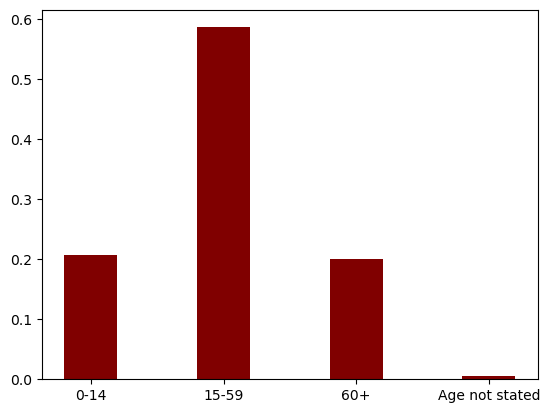

In [34]:
age_cat = df["Age-group"].unique()
age_count = []
for i in range(0, len(age_cat)):
    age_count.append(sum(df[df['Age-group'] == age_cat[i]]['Total disabled population - Persons']))
plt.bar(age_cat,age_count,color ='maroon', 
        width = 0.4)


In [69]:
# sum(df[df['Age-group'] == age_cat[0]]['Total disabled population - Persons'])
age_count

[0.20780672186613194,
 0.5865465791265888,
 0.2005079322411929,
 0.005138766766086163]

In [71]:
import joblib
joblib.dump(voting_clf,'disability_model.joblib')

['disability_model.joblib']

In [72]:
joblib.dump(cat_coder,'cat_coder.joblib')

['cat_coder.joblib']

In [73]:
joblib.dump(le,'label_transformer.joblib')

['label_transformer.joblib']